In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [3]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

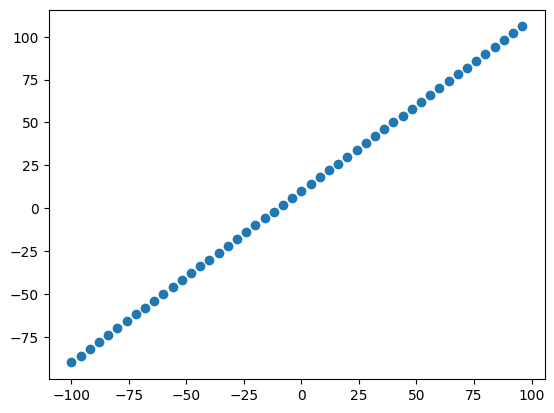

In [4]:
plt.scatter(X,y)
plt.show()

In [5]:
len(X), len(y)

(50, 50)

In [6]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

In [7]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [8]:
# Lets create a model which builds automatically by defining the input_shape argument

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 61ms/step


In [17]:
# View the predictions
y_preds

array([[53.58368 ],
       [57.069466],
       [60.555252],
       [64.04104 ],
       [67.526825],
       [71.01261 ],
       [74.4984  ],
       [77.984184],
       [81.46997 ],
       [84.955765]], dtype=float32)

In [16]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
    
    # Plots training data, test data and compares predictions
    
    plt.figure(figsize=(10,7))
    
    # Plot training data in magenta
    plt.scatter(train_data, train_labels, c="m", label="Training Data")
    
    # Plot test data in cyan 
    plt.scatter(test_data, test_labels, c="cyan", label="Testing Data")
    
    # Plot the predictions in orange (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="orange", label="Predictions")
    
    # Show the legend
    plt.legend()
    
    plt.show()

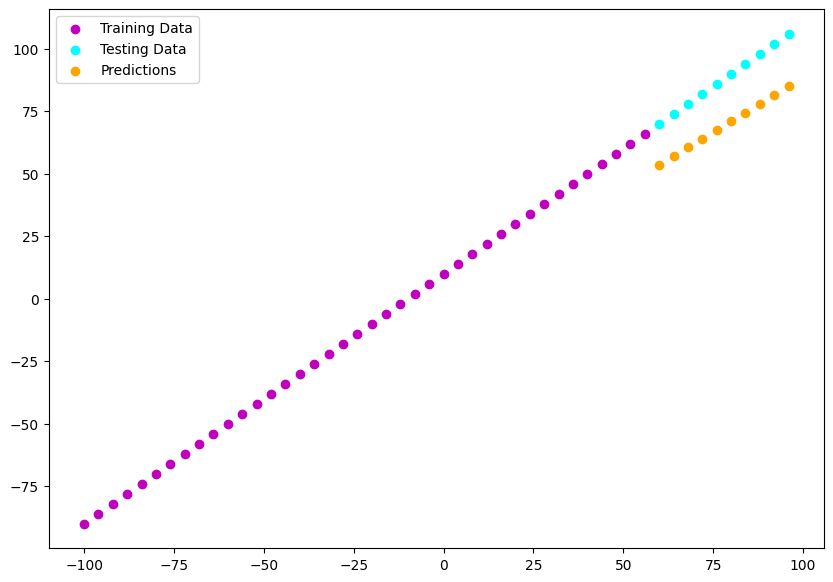

In [18]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)